<div class="clearfix" style="padding: 10px; padding-left: 0px">
<h1 style="color:rgb(150,0,0);text-align:center">  Notebook B : Document clustering and comparaison</h1>
<h1 style="color:rgb(150,0,0) ;text-align:center">  Began 21 May 2020</h1>

<h1 style="color:rgb(0,150,0);text-align:left">  Intro</h1>
<br/>
First part is for clustering previous doc vectors and computing their centroid vector
<br/>
<br/>
Second part is for testing whether a new document belongs to a cluster or is a new type of doc

<h1 style="color:rgb(0,0,200);text-align:left">  Clustering and centroids computation</h1>
<br/>
'Notebook a' has provided a vector for each document, now we want to make clusters of them. To do so we will look for the right number of clusters to ask for with k means method. Then we will compute each cluster's centroid.

In [ ]:
# load vectors in txt file
# put them in the right format
# do clustering with k means
# evaluate our clusters with a score
# compute centroids of the clusters

### a) create list of report vectors

In [11]:
def w2vreports_to_list_of_report_vectors(filename):

    file = open(filename, "r")
    lines = file.readlines()
    file.close()

    report_vectors = [] # will contain every vectors as sublists e.g. [[0.13, ..., -0.87], [-0.45, ..., 0.02], ...]

    for line in lines :
        line = line.split() # turn into list each line, they contain the word and its n dimensions
        report_vector = [float(i) for i in line]
        report_vectors.append(report_vector)
    
    return report_vectors

In [12]:
report_vectors = w2vreports_to_list_of_report_vectors('w2v_doc_vectors_57_100d_5e.txt')

### b) kmeans algo over doc vectors

In [13]:
# entry : matrix of doc vectors (each line is a vector) and number of desired clusters

# outputs :
# labels : list of cluster numbers corresponding to the inputs
# centroids : vectors which point the center of each cluster

def kmeans(report_vectors, num_clusters, num_runs, max_iterations):

    from sklearn import cluster
    from sklearn import metrics
    m=num_clusters
    n=num_runs # default=10
    p=max_iterations # default=300
    kmeans = cluster.KMeans(n_clusters=m, n_init=n, max_iter=p)
    kmeans.fit(report_vectors)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    n_iterations = kmeans.n_iter_
    inertia = kmeans.inertia_
    
    return (labels, centroids, n_iterations, inertia)

In [20]:
labels, centroids, n_iterations, inertia = kmeans(report_vectors, 2000, 40, 100)
print(inertia)
lowesim = intra_cluster_check(labels, centroids, report_vectors)
evaluate_lowesim(lowesim)
inter_cluster_check(report_vectors, labels)
evaluate_clustering_quality(report_vectors, labels)

14092.369350454954
0.0 0.0285 0.3195 0.652
[]
0.022407481498705174
1.6798736757329675


In [21]:
labels, centroids, n_iterations, inertia = kmeans(report_vectors, 3000, 40, 100)
print(inertia)
lowesim = intra_cluster_check(labels, centroids, report_vectors)
evaluate_lowesim(lowesim)
inter_cluster_check(report_vectors, labels)
evaluate_clustering_quality(report_vectors, labels)

11926.515248603084
0.0 0.006333333333333333 0.195 0.7986666666666666
[]
0.02159925708231674
1.400735272806995


### b_bis) store labels and centroids created

In [29]:
def store_labels(entry_list, output_filename):
    
    MyFile=open(output_filename,'w')

    for e in entry_list:
        MyFile.write(str(e)+'\n')
        
    MyFile.close()

In [30]:
store_labels(labels, 'labels_57_100d_5e.txt')

In [70]:
def store_centroids(entry_list, output_filename):
    
    MyFile=open(output_filename,'w')

    for e in entry_list:
        e = e.tolist()
        for i in range(len(e)):
            MyFile.write(str(e[i])+' ')
        MyFile.write('\n')
        
    MyFile.close()

In [71]:
store_centroids(centroids, 'centroids_57_100d_5e.txt')

### c) study intra cluster quality

In [15]:
def find_lowest_similarity_in_a_cluster(label_of_studied_cluster, labels, centroids, report_vectors):
    # get vector members of our new report closest cluster
    cluster_members=[]
    for i in range (len(labels)):
        if labels[i]==label_of_studied_cluster:
            cluster_members.append(report_vectors[i])

    # list of distances between the centroid and vectors of the cluster
    from sklearn.metrics.pairwise import cosine_similarity
    similarities=[]
    cluster_center=centroids[label_of_studied_cluster]
    for e in cluster_members:
        similarities.append(cosine_similarity([e], [cluster_center])[0][0])

    # find the lowest similarity score inside the cluster
    min_sim = min(similarities)
    return min_sim

In [16]:
def intra_cluster_check(labels, centroids, report_vectors):
    T=[]
    for i in range (max(labels)+1):
        lowest_sim = find_lowest_similarity_in_a_cluster(i, labels, centroids, report_vectors)
        T.append(lowest_sim)
    return T

In [17]:
def evaluate_lowesim(lowesim):
    L1, L2, L3, L4 = [], [], [], []
    n=len(lowesim)
    for e in lowesim:
        if 0.90<e:
            L1.append(e)
        elif 0.80<e<=0.90:
            L2.append(e)
        elif 0.70<e<=0.80:
            L3.append(e)
        elif 0.60<e<=0.70:
            L4.append(e)
    print(len(L4)/n, len(L3)/n, len(L2)/n, len(L1)/n)
    print(L4)

In [75]:
lowesim = intra_cluster_check(labels, centroids, report_vectors)

In [76]:
evaluate_lowesim(lowesim)

0.05 0.25 0.6 0.1
[0.676399349788221]


### d) study inter cluster quality

In [18]:
def inter_cluster_check(report_vectors, labels):
    
    from sklearn.metrics import silhouette_score
    score = silhouette_score(report_vectors, labels)
    print(score)

In [106]:
inter_cluster_check(report_vectors, labels)

0.1212420666752444


### e) evaluate clustering quality

In [19]:
# entries : vectors and their associated cluster labels
# output : davies_bouldin_score (close to 0 means good clustering quality in terms of separation and consistency)

def evaluate_clustering_quality(report_vectors, labels):
    
    from sklearn.metrics import davies_bouldin_score
    score = davies_bouldin_score(report_vectors, labels)
    print(score)

In [78]:
evaluate_clustering_quality(report_vectors, labels)

1.7106585160648815


### f) looking for the right number of clusters to ask

In [125]:
# entry :  txt file of doc vectors in w2v format
# output : draw graph and give the min of it

def find_right_number_of_clusters(filename, start_num_clusters, end_num_clusters): # start_num_clusters >= 2
    
    # import useful libraries
    from sklearn.metrics import davies_bouldin_score
    import matplotlib.pyplot as plt
    
    # create lists of vectors
    report_vectors = w2vreports_to_list_of_report_vectors(filename)
    
    # iterate over the number of clusters to determine which number gets the best score in the end
    X=[k for k in range (start_num_clusters, end_num_clusters+1, 50)]
    
    # build a list of scores for each number of clusters
    Y=[]
    
    for i in X:
        
        # build the clusters
        labels, centroids, n_iterations, inertia = kmeans(report_vectors, i, 10, 300)
        
        # evaluate those clusters
        #score = davies_bouldin_score(report_vectors, labels)
        score = inertia
        
        Y.append(score)
    
    if len(X) >= 2 :
        plt.plot(X, Y)
        plt.ylabel("Score")
        plt.xlabel("Number of clusters")
        plt.show()
    
    m = min(Y)
    m_ind = Y.index(m)
    n = X[m_ind]
    
    print ('minimum davies bouldin score : ', m) 
    print('corresponding number of clusters : ', n)

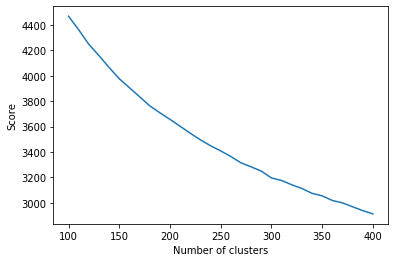

minimum davies bouldin score :  2911.3155324855347
corresponding number of clusters :  400


In [121]:
find_right_number_of_clusters('w2v_doc_vectors_10000_100d_5e.txt', 500, 2000)

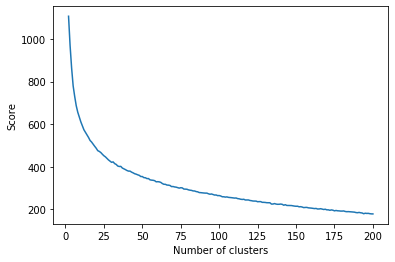

minimum davies bouldin score :  178.15913653204097
corresponding number of clusters :  200


In [20]:
find_right_number_of_clusters('w2v_doc_vectors_10d.txt', 100, 400)

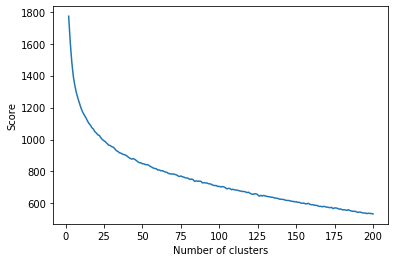

minimum davies bouldin score :  534.1724796930517
corresponding number of clusters :  200


In [21]:
find_right_number_of_clusters('w2v_doc_vectors_100d.txt', 2, 200)

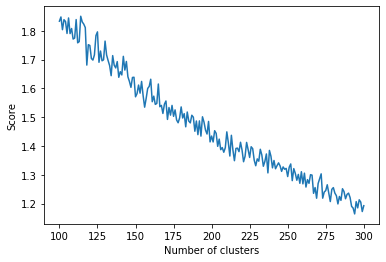

minimum davies bouldin score :  1.164188743594436
corresponding number of clusters :  294


In [4]:
find_right_number_of_clusters('w2v_doc_vectors.txt', 100, 300)

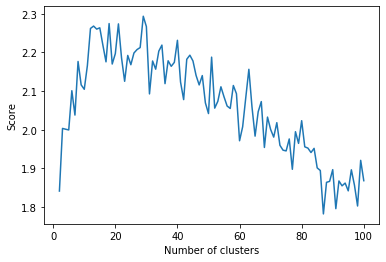

minimum davies bouldin score :  1.7824422811414748
corresponding number of clusters :  87


In [6]:
find_right_number_of_clusters('w2v_doc_vectors.txt', 2, 100)

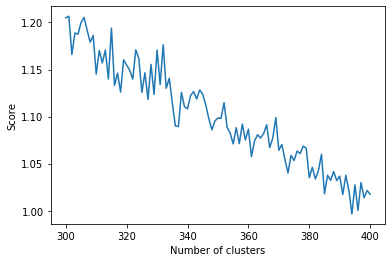

minimum davies bouldin score :  0.9965771384966586
corresponding number of clusters :  394


In [7]:
find_right_number_of_clusters('w2v_doc_vectors.txt', 300, 400)